In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [10]:
from scipy.stats import norm
from scipy.stats import binom

# What is a p-value?

Let's explore this question with a simple experiment involving a coin toss.  We are worried that a coin tossed by our friend is not fair, but is biased towards heads.  Since we know statistics, we can test the level of evidence against the null hypothesis that the coin is fair, and then decide if we think that that level of evidence is high enough to decide if the coin is fair or unfair.      

Remember the steps of hypothesis testing in statistics:

Decide on the statistical test:  We will test an experiment (set of observations) against some theoretical value.  Here we will test if the result of the experiment is 50-50 or 0.5 probability that we expect, so this would be a one-sample test.  

We will find the level of evidence against a null hypothesis model: H0: the coin is fair

Decide on the prior significnace level that we want to work with (type I error = alpha =0.05 = 1 - confidence level).  

Let's toss a coin and look at a one-sample test to test if the coin is fair or biased. 

let's set up a world where the null hypothesis is true (and all of the model assumptions are perfectly true): the null hypothesis is that the coin is fair (P(X=heads)=0.5)).   

We will simulate the experiment of tossing a fair coin 1000 times.  We will do this experiment 10,000 times.

Text(0.5, 9.444444444444459, 'number of heads out of 1000 tosses for a fair coin')

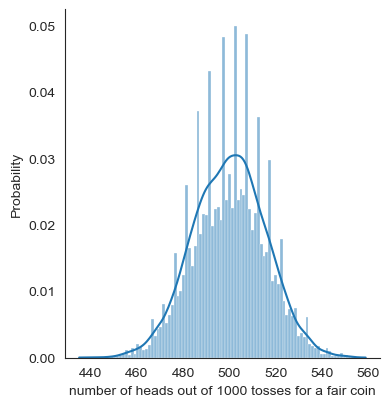

In [11]:
np.random.seed(seed=233423)
n=1000
p=0.5
binomial_rvs=binom.rvs(n,p,size=10000)
sns.displot(binomial_rvs,stat='probability',kde=True,height=4,aspect=1,bins=100)
plt.xlabel("number of heads out of 1000 tosses for a fair coin")

This empirical evidence looks like the random variable of the number of heads out of a 1000 tosses is a normal distribution. 

It turns out that since we have a sample size that is large, n=1000, we can use the **normal approximation** to the binomial (n * p and n * q need to be greater than 5), so this should look familiar to all the parametric statistcial tests we have learned.  We can now think of this experiment in terms of a sample mean and variance in a normal distribution

# Let's go from one sample to the sampling distribution of the sample means so that we can use a statistical test of the sample mean.

set up that 1 coin toss is 0 or 1

for a fair coin

mean=mu=p=0.5

variance = p * q = 0.25

Though this is a binomial experiment, if n is sufficiently large, then X~N(np, npq) by the normal approximation. 

Xbar = sample number of heads out of 1000 coin tosses

Then Xbar for the sampling distribution (for each sample Xbar and through the CLT) ~N (mu = n*p = 500, and with a SE (standard error or the mean) = sigma/ sqrt(n) = n* (sqrt(p * q)/ sqrt(n)) = 15.81

The sampling distribution of the sample mean Xbar, with a mean = 500 and a standard error = 15.81

We will find the probability of finding a sample from this sampling dsitribution, given that a null hypothesis that we will set up is true.  This is a conditional probability:  the probability of finding a test statistic given that the null is true.  

Text(0, 0.5, 'pdf of normal distribution')

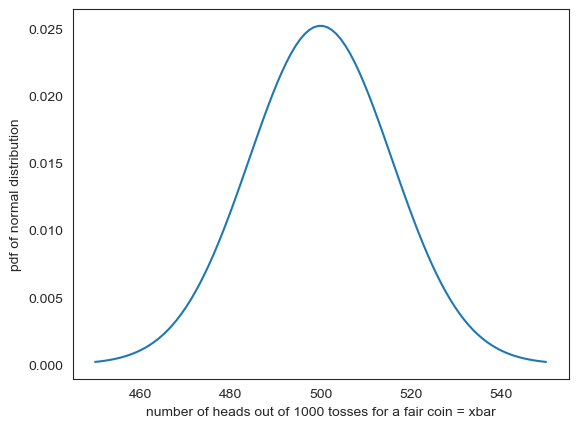

In [12]:
xA=np.linspace(450,550,100)
normal_A=norm.pdf(xA,loc=500,scale=15.81)
ax1=sns.lineplot(x=xA,y=normal_A)
plt.xlabel("number of heads out of 1000 tosses for a fair coin = xbar")
plt.ylabel("pdf of normal distribution")

# Now let's run an experiment:  toss a coin 1000 times. 

you find that you get 600 heads (x=600).

set up the null and alternative hypothesis

null is that the coin is fair = equal probability heads =0.5  

alternative is that probability > 0.5

let's set up a world where the null is true

What is the expected number of heads in this null world? 500

What number of heads happened in your experimental observation? 600

Is this observed value as extreme or more extreme than that found in the null world? Yes

So what do you conclude based on this evidence?

# What is the probability of finding 600 heads, or more, in the null world?  

What is the p-value associated with finding this observation, or one more extreme, in the null world?

Standardize the observation

z=(xbar-mu)/SE = (600-500)/15.81 = 6.32

Is this a large z-statistic?  How many standard errors away from the mean is this z-statistic?

How do you find the probability of a z-statistic?


P(X>=500) = (z>=6.32) = 1-z(<=6.32) ~ 0

p=1.31*e-10

Is this probability of finding the test statistic big or small?  

Is there a small probability of finding this test statistic, or one more extreme, in the null world?

How much confidence do you have in the null hypothesis within this model?

What do you conclude about the null hypothesis (remember that the only conclusions you can draw is to reject the null or fail to reject the null)?

In [13]:
norm.sf(6.32)

1.3078165132642286e-10

In [14]:
binom.sf(600,1000,.5)

9.008412706280342e-11

# Do another experiment.

you find that you get 527 heads (x=527).  This is the observed result that you find in the real, experimetal world.  

set up the null and alternative hypothesis

null is that the coin is fair = equal probability heads =0.5  

alternative is that probability > 0.5

let's set up a world where the null is true

find the test-statistic when xbar=527.

z=(xbar-mu)/SE = (527-500)/sqrt(250) = 1.71

Is this test statistic unlikely in the world that you made where the null hypothesis is true?

What is the probability of finding the test statistic or a value more extreme than the test statistic in the null hypothesis world?

Wikipedia:  "In null-hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct."

how do you find the probability of z-statistic?

P(X>=527) = (z>=1.71) = 1-z(<=1.71) = 0.044

We say that this probability (p-value), or 4.4% chance, is low enough that we do not believe in the evidence supporting the null hypothesis.  It quantifies the level of evidence in favor of the statistical model (the null hypothesis is true and the statistical assumptions/processes are true).

we would reject the null hypothesis and conclude that the coin is biased.

In [15]:
norm.sf(1.71)

0.0436329365240319

In [16]:
binom.sf(527,1000,.5)

0.040969350894406724

# Run the experiment again.

you find that you get 526 heads this time (x=526).

P(X>=526) = (z>=1.6444) = 1-z(<=1.64) = 0.051

we would fail to reject the null hypothesis and conclude we do not have enough evidence to conclude that the coin is biased. 

The probability (or p-value) of this event happening with a fair coin is 0.051, and this 5.1% chance does not meet our criteria for being unlikely.  

In [17]:
norm.sf(1.64)

0.05050258347410371

We set up a null hypothesis model and then test the probability of finding a statistic at least as extreme as the one observed from the sample.

Text(0, 0.5, 'pdf of normal distribution')

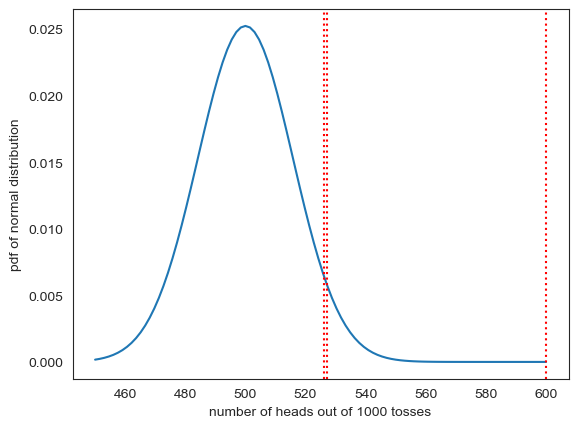

In [18]:
xA=np.linspace(450,600,100)
normal_A=norm.pdf(xA,loc=500,scale=15.81)
ax1=sns.lineplot(x=xA,y=normal_A)
ax1=plt.axvline(x=600,color='red', linestyle=":")
ax1=plt.axvline(x=527,color='red', linestyle=":")
ax1=plt.axvline(x=526,color='red', linestyle=":")
plt.xlabel("number of heads out of 1000 tosses")
plt.ylabel("pdf of normal distribution")

In [19]:
norm.ppf(0.95,500,15.81)

526.0051358421027

# What a p-value is not.

In null-hypothesis significance testing, the p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct and that the statistical assumptions/processes (i.e. the model) are correct.

1. https://www.amstat.org/asa/files/pdfs/p-valuestatement.pdf

## 1. **"p-values do not measure the probability that the null hypothesis is true"** (1) 

We want the p-value to be a probability statement about our studied hypothesis, but it is not.  We find the p-value based on the statement that the null hypothesis is 100% true, so it cannot be a probability for this.  

The p-value is the probability in **P(experimental-statistic|null)** = the conditinal probability of finding the test statistic given that the null hypotheiss is true and that the populatiom mean which the sample mean comes from is equal to the theoretical population mean.  

This is not the P(null|experimental-statistic)

For an coin toss example above, there is not a 4.4% probability that the null is true.  There is a 4.4% probability that the test statistic or one more extreme was obtained assuming the null hypothesis is true.     

## 2. **p-values do not measure the "probability that the data were produced by random chance alone"** (1)

This is the same as the fallacy above.  We could expand the first statement and say:  p-values do not measure the probability that the null hypothesis (the null hypothesis is that there is no effect in the true population and therfore that random chance alone produced the observed result) is true.

A p-value is a probability calculated for the test results assuming a random chance model (as opposed to a probability that the data were produced by random chance). 

For a coin toss example above, there is not a 4.4% probability that chance alone produced the test statistic.  There is a 4.4% probability that the test statistic or one more extreme was obtained assuming that only chance operated on the model.  

## 3. **p-values are not a Type I error (or a Type 2 error); are not a false positive rate, are not the probability of rejecting the null when it is true; are not the probability of making a mistake and stating that there is an effect when there isnt one**

The p-value is not an error rate.  The alpha value is an error rate and refers to the long-term false positive rate that you are willing to have as cutoff value for your probability, often set at 5% (alpha=0.05).    

For a coin toss example above, there is not a 4.4% chance of a false positive rate.  

4. ** A P-value, or statistical significance, does not measure the size of an effect or the importance of a result." (1)

Statistical significance does not provide evidence for the size of any effect.  It also does not equate to engineering/scientific/practical significance.  

# What a p-value is

In null-hypothesis significance testing, **the p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct** and that the statistical assumptions/processes (i.e. the model) are correct.

What does this mean?    

The p-value provides you with a quantification for how suprised you would be to find a results at least as suprising as the one you observed, assuming that the suprise comes from random chance rather than from a true effect.  The smaller the p-value, the greater the statistical incompatibility of the data with the null hypothesis, if the underlying assumptions used to calculate the p-value hold.  

In the examples above, the p-value of 0.044 means that you are a little suprised by the result if the coin was fair:  There is a 4.4% chance of finding this test statistic or one more extreme from a sampling distribution where only random chance produced the distribution.  This is a fairly small chance, and if you compare it with an aplha value of 0.05, then you can state that the level of evidence does not support the null hypothesis (null is that the coin is fair) and reject it; the finding is statistically significant.  This flags the data as being unusual if the null were true and all the other assumptions that you used to compute it were correct (such as the data being independent, normality, equal variance, study design and protocol, etc).  If you review your assumptions and other knowledge about the experiment and other evidence, and this review convinces you that the model can be rejected, you can accept the alternative hypothesis and conclude that the coin is bias.      

Since this is about a confidence in the evidence, you can think of the p-value as the probability of future, long-term run of studies when the null is true.  You can interpret the p-value of 0.044 as 4.4% of studies will obtain the effect observed, or larger, beacuse of chance, if the null is true and everything else in the model is correct.  This is beacuse 4.4% of samples drawn from the sampling distribution where the null is true will have an effect this large or larger, beacuse of random sampling error.  The results of 527 heads out of 1000 coin tosses will happen by chance in 4.4% of samples drawn from a population in which a coin is fair (our null hypothesis).    

Remember, this is not the same as stating that there is a 4.4% chance of the null being true, or of finding the result by chance alone where the alternative hypothesis is true, or of making a mistake in rejecting a true null hypothesis.  If these interpretations were true, there would be strong evidence to reject the null hypothesis.  However, we are rejecting the null hypothesis based on the findings from a mdoel where all assumptions are true including the null hypothesis and this provides much weaker evidence.  This is why the ASA states (1):  "By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis."  

## Provide effect sizes and confidence intervals for statistical tests

Full reporting and transparencey of statistical tests requires, at the least, examining the sizes of effect estimates and confidence limits as well as providing precise P-values.

Prior to the experiment, for the coin toss exmaple above:

- Specify the null hypothesis the alternate hypothesis. 

- Specify the effect size that we consider clinically and economically important and relevant to the patients in question along with the confidence interval.  

- Specifiy in adequate detail the outcome of interest and measurement; measures of sample size considerations (alpha, beta, engineering/clinical/realistic effect sizes), provide adequate detail about study protocol and sampling, and document all findings and analyses performed.   

After the experiment:

- Specify the effect size estimate of the experiment for the coin toss experiment above. 

- Specify the confidence interval that you have for this effect size estimate. 